# Question 2: Height vs leg length vs arm length
 What’s the relationship between height and leg length and arm length. Does this
relationship change with age?



In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
bmx = pd.read_sas('BMX_I.XPT')
demo = pd.read_sas('DEMO_I.XPT')
#combine two tables together
finalData = pd.merge(left = demo,right = bmx,on = 'SEQN')
adultData = finalData.loc[finalData.loc[:,'RIDAGEYR']>=20]

#### For all adults aged 20 and up, who have all three measurements of height, upper leg length, and upperarm length:
What is the correlation between standing height and upper leg length?

In [65]:
adultData_temp=adultData.dropna(how='any',subset=['BMXLEG','BMXHT','BMXARML'])

In [66]:
# I create a adultData_temp because I am not sure how many NaN each column has

print('The correlation is:',adultData.loc[:,'BMXLEG'].corr(adultData.loc[:,'BMXHT']))

The correlation is: 0.7870663123395181


What is the correlation between standing height and upper arm length?

In [67]:
#adultData_temp=adultData.dropna(how='any',subset=['BMXARML','BMXHT'])
print('The correlation is:',adultData.loc[:,'BMXARML'].corr(adultData.loc[:,'BMXHT']))

The correlation is: 0.7954967098037544


What is the correlation between upper leg length and upper arm length?

In [68]:
#adultData_temp=adultData.dropna(how='any',subset=['BMXARML','BMXLEG'])
print('The correlation is:',adultData.loc[:,'BMXARML'].corr(adultData.loc[:,'BMXLEG']))

The correlation is: 0.6301246425751609


Make adult age groups by decade: i.e. adults aged 20-29.9, adults aged 30-39.9, … adults aged
70-79.9, adults aged 80+ (7 groups total). 

For each age group, calculate the mean of the three values.


In [69]:
mean = pd.cut(adultData.loc[:,'RIDAGEYR'], bins = np.arange(20,99, 10), right = False)
meanDF = pd.DataFrame({'age_group':mean})
adult_group = pd.merge(left=adultData,right=meanDF,right_index=True,left_index=True)
adult_mean = adult_group.groupby(['age_group'])['BMXLEG','BMXHT','BMXARML'].mean()
age = ['20-29.9','30-39.9','40-49.9','50-59.9','60-69.9','70-79.9','80+']

We want to make a plot with three lines showing the relationship between the age
decade and the mean height, leg length, and arm length

However, because leg length and arm length are similar in scale, but height is not,
create an ‘adjusted height’ column which is the mean height minus 128 cm.

Plot three lines: adjusted height, leg length, arm length. 

The x-axis will be the age decade, and the y-axis will be the mean measurement for each
age group

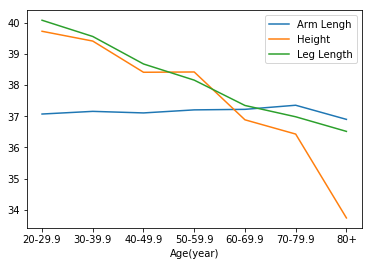

In [70]:
height_adj = np.array(adult_mean.loc[:,'BMXHT'])-128
l1,=plt.plot(age,adult_mean.loc[:,'BMXARML'],label='Arm Lengh')
l2,=plt.plot(age,height_adj,label='Height')
l3,=plt.plot(age,adult_mean.loc[:,'BMXLEG'],label='Leg Length')
plt.legend(loc='upper right')
plt.xlabel('Age(year)')
plt.show()
